In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import distributions
from scipy.optimize import minimize

In [4]:
!wget --no-check-certificate https://astrostatistics.psu.edu/datasets/censor.dat

--2020-04-02 20:34:09--  https://astrostatistics.psu.edu/datasets/censor.dat
Resolving astrostatistics.psu.edu (astrostatistics.psu.edu)... 168.62.182.234
Connecting to astrostatistics.psu.edu (astrostatistics.psu.edu)|168.62.182.234|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 3932 (3.8K)
Saving to: ‘censor.dat’

censor.dat          100%[===================>]   3.84K  --.-KB/s    in 0s      

2020-04-02 20:34:10 (25.1 MB/s) - ‘censor.dat’ saved [3932/3932]



In [5]:
with open('./censor.dat', 'r') as inp:
    for i in range(5):
        print(inp.readline())

Star     Type  Teff  Ind_Be logN_Be sig_Be  Ind_Li logN_Li

BD-103166  1   5320    1    0.50     NaN     1      NaN

HD_6434    1   5835    1    1.08    0.10     0      0.8

HD_9826    1   6212    1    1.05    0.13     1      2.55

HD_10647   1   6143    1    1.19    0.10     1      2.80



In [6]:
!head censor.dat

Star     Type  Teff  Ind_Be logN_Be sig_Be  Ind_Li logN_Li
BD-103166  1   5320    1    0.50     NaN     1      NaN
HD_6434    1   5835    1    1.08    0.10     0      0.8
HD_9826    1   6212    1    1.05    0.13     1      2.55
HD_10647   1   6143    1    1.19    0.10     1      2.80
HD_10697   1   5641    1    1.31    0.13     1      1.96
HD_12661   1   5702    1    1.13    0.13     0      0.98
HD_13445   1   5613    0    0.40     NaN     0     -0.12
HD_16141   1   5801    1    1.17    0.13     1      1.11
HD_17051   1   6252    1    1.03    0.13     1      2.66


In [8]:
np.genfromtxt('./censor.dat', names= True)

array([(nan, 1., 5320., 1.,  0.5 ,  nan, 1.,   nan),
       (nan, 1., 5835., 1.,  1.08, 0.1 , 0.,  0.8 ),
       (nan, 1., 6212., 1.,  1.05, 0.13, 1.,  2.55),
       (nan, 1., 6143., 1.,  1.19, 0.1 , 1.,  2.8 ),
       (nan, 1., 5641., 1.,  1.31, 0.13, 1.,  1.96),
       (nan, 1., 5702., 1.,  1.13, 0.13, 0.,  0.98),
       (nan, 1., 5613., 0.,  0.4 ,  nan, 0., -0.12),
       (nan, 1., 5801., 1.,  1.17, 0.13, 1.,  1.11),
       (nan, 1., 6252., 1.,  1.03, 0.13, 1.,  2.66),
       (nan, 1., 6109., 1.,  0.93, 0.12, 1.,  1.99),
       (nan, 1., 5073., 1.,  0.77,  nan, 0.,  0.25),
       (nan, 1., 4825., 0.,  0.3 ,  nan, 0., -0.47),
       (nan, 1., 5674., 0., -0.1 ,  nan, 0.,  0.61),
       (nan, 1., 5268., 0.,  0.8 ,  nan, 0., -0.02),
       (nan, 1., 6103., 1.,  1.25, 0.11, 1.,  2.88),
       (nan, 1., 6143., 1.,  1.36,  nan, 1.,  2.85),
       (nan, 1., 6016., 1.,  1.27,  nan, 1.,  2.51),
       (nan, 1., 5821., 1.,  1.19, 0.11, 1.,  1.34),
       (nan, 1., 5924., 1.,  1.23, 0.11, 1.,  

In [9]:
import pandas as pd #handy for reading in files

In [11]:
df = pd.read_csv('censor.dat', delim_whitespace=True)

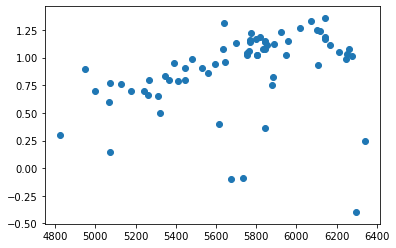

In [14]:
plt.scatter(df.Teff, df.logN_Be)

In [15]:
def build_linear_model(slope, intercept):
    def linear_model(length):
        return length * slope + intercept
    return linear_model

In [20]:
def lnlikelihood(x):
    slope, intercept, sigma_noise = x
    
    linear_model = build_linear_model(slope, intercept)
    residuals = df.logN_Be - linear_model(df.Teff)
    
    lnlike = np.sum(distributions.norm.logpdf(residuals, loc=0, scale=sigma_noise))
    return lnlike

In [21]:
x0 = [.001, 0 , 1]

In [23]:
sol = minimize(lambda x: -lnlikelihood(x), x0, method='powell')

In [24]:
sol

   direc: array([[ 8.13258387e-04, -4.64217455e+00, -4.26019868e-02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.39859538e-05,  7.98334692e-02, -2.17639097e-02]])
     fun: 21.80216425473233
 message: 'Optimization terminated successfully.'
    nfev: 594
     nit: 15
  status: 0
 success: True
       x: array([ 3.02484977e-04, -8.35884541e-01,  3.33431734e-01])

In [25]:
best_fit_params = sol.x
best_fit_model = build_linear_model(best_fit_params[0], best_fit_params[1])

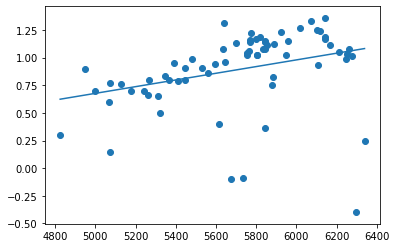

In [26]:
plt.scatter(df.Teff, df.logN_Be)
x_grid = np.linspace(min(df.Teff), max(df.Teff))
plt.plot(x_grid, best_fit_model(x_grid))